In [1]:
import sys
sys.path.append('../')

from importlib import reload

import numpy as np
import tensorflow as tf

import sentinel.data.load
reload(sentinel.data.load)
from sentinel.data.load import parse_tfrecord

import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

DATA_PATH = '/mnt/data/sentinel/dstl-satellite-imagery-feature-detection/tfrecords/*-[0-9].tfrecord'
SPARSE_DATA_PATH = '/mnt/data/sentinel/dstl-satellite-imagery-feature-detection/tfrecords/*-sparse.tfrecord'

/home/adrian/.pyenv/versions/miniconda3-latest/envs/sentinel/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Load data
* create sampler based on heatmaps -> create heatmaps based on pixelwise counts of classes per image in the batch

In [ ]:
import sentinel.data
reload(sentinel.data)
from sentinel.data import get_input_fn
from glob import glob

filenames = glob(DATA_PATH)
num_samples = len(filenames)

# Parameters
num_patches = 10
patch_size = 128
batch_size = 20

sess = tf.InteractiveSession()

train_input_fn, eval_input_fn = get_input_fn(filenames, num_patches, patch_size, batch_size)

next_eval_example, next_eval_label = eval_input_fn()
eval_image, eval_mask = sess.run([next_eval_example, next_eval_label])
print(eval_image.shape, eval_mask.shape)

next_patch_example, next_patch_label = train_input_fn()
print(next_patch_example, next_patch_label)
patch_image, patch_mask = sess.run([next_patch_example, next_patch_label])
print(patch_image.shape, patch_mask.shape)

np.unique(eval_mask), np.unique(patch_mask)

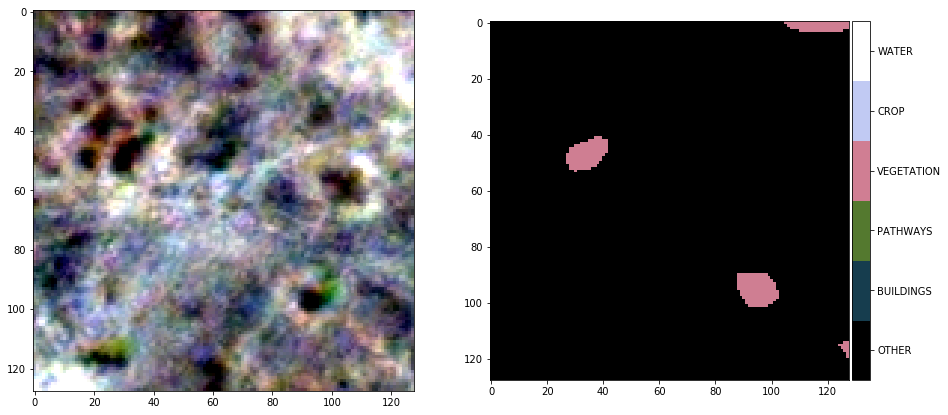

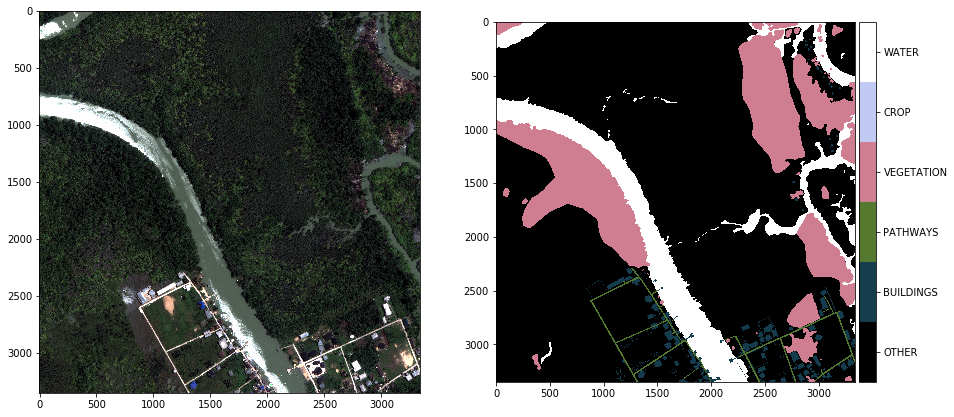

In [4]:
import sentinel.visualization
reload(sentinel.visualization)
from sentinel.visualization import discrete_cmap, colorbar

import sentinel.data
reload(sentinel.data)
from sentinel.data import stretch_8bit, read_image, HIERARCHIES

i = 10
N = len(HIERARCHIES)
cmap = discrete_cmap(N, 'cubehelix')
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=[15, 10])
ax0.imshow(stretch_8bit(patch_image[i].squeeze()))
img1 = ax1.imshow(patch_mask[i].squeeze(), interpolation='nearest', cmap=cmap)
colorbar(img1, ticks=range(N), labels=HIERARCHIES)


i = 0
N = len(HIERARCHIES)
cmap = discrete_cmap(N, 'cubehelix')
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=[15, 10])
ax0.imshow(stretch_8bit(eval_image[i].squeeze()))
img1 = ax1.imshow(eval_mask[i].squeeze(), interpolation='nearest', cmap=cmap)
colorbar(img1, ticks=range(N), labels=HIERARCHIES)